# <font color=#BB44>**Clustering example: OSA case study**</font>
### PRDL & MLLB courses ETSIT - UPM

* ## Following:
> * ## **Marcos Sánchez Hernández** (many thanks!!!)
> * ## [Comparison Of K-Means & Hierarchical Clustering In Customer Segmentation](https://analyticsindiamag.com/comparison-of-k-means-hierarchical-clustering-in-customer-segmentation/)



---
# Reading OSA Data: We are going to use EXTREME cases to have severe/healthy classes



In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving OSA_extreme_male.xlsx to OSA_extreme_male.xlsx
User uploaded file "OSA_extreme_male.xlsx" with length 19282 bytes


In [2]:
ls 

OSA_extreme_male.xlsx  sample_data/


---

# IMPORT OSA data into Pandas Data Frame




In [3]:
import pandas as pd

data = pd.read_excel("OSA_extreme_male.xlsx")

In [4]:
data.head()

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA,BMI
0,P0005,hombre,9.0,80,173,32,40,Healthy,26.729927
1,P0006,hombre,2.0,109,190,32,42,Healthy,30.193906
2,P0007,hombre,34.0,86,169,39,42,Severe,30.110991
3,P0008,hombre,60.0,145,172,47,44,Severe,49.012980
4,P0013,hombre,3.7,90,180,36,40,Healthy,27.777778


---
---
# **IMPORTANT**: 

* in this example we are look for clusters using Weight, Height, Age, Cervical and BMI

* once clusters are obtained we will try:


> 1.- Understand the clusters, for example ¿are some clusters representing old persons with high BMI? ¿young and not obese? etc...


> 2.- explore whether or not some clusters mainly contain severe or healthy











In [5]:
features_of_interest = ["IAH", 	"Weight", "Height", "Age", "Cervical", "BMI"]

In [6]:
X = data[features_of_interest]

In [7]:
X.head(5)

,IAH,Weight,Height,Age,Cervical,BMI
0,9.0,80,173,32,40,26.729927
1,2.0,109,190,32,42,30.193906
2,34.0,86,169,39,42,30.110991
3,60.0,145,172,47,44,49.012980
4,3.7,90,180,36,40,27.777778


# **IMPORTANT NOTE ON "Distance"**:
* ## If we use Euclidean distance ... we should normalize data?



In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [9]:
X_normalized[0:5,]

array([[-0.70381432, -0.66910383, -0.35777526, -1.27400745, -0.64645379,
        -0.58394753],
       [-1.0125062 ,  0.89355987,  1.9458295 , -1.27400745, -0.05333777,
         0.05253164],
       [ 0.39865669, -0.3457941 , -0.89979992, -0.70024709, -0.05333777,
         0.03729659],
       [ 1.54522654,  2.83341827, -0.49328143, -0.04452097,  0.53977824,
         3.51039068],
       [-0.93753817, -0.13025428,  0.59076788, -0.94614439, -0.64645379,
        -0.39141316]])

# **Let's start using k-means**
* ## In order to implement the K-Means clustering, we need to find the optimal number of clusters in which customers will be placed. 

* ## To find the optimal number of clusters for K-Means, the Elbow method is used based on Within-Cluster-Sum-of-Squares (WCSS).

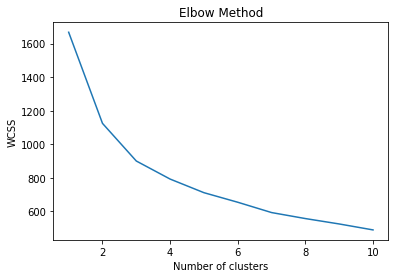

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_normalized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## *As we can see in the above figure, the above plot is visualized as a hand and we need to identify the location of the elbow on the X-axis. In the above plot, the elbow seems to be on point 5 of X-axis. So, the optimal number of clusters will be 5 for the K-Means algorithm*

---
# *After finding the optimal number of clusters, fit the K-Means clustering model to the dataset defined in the second step and then predict clusters for each of the data elements. It means it will predict which of the 5 clusters the data item will belong to.*

In [11]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_normalized)

# **EXPLORE THE CLUSTER CENTERS**

In [12]:
kmeans.cluster_centers_

array([[ 0.53063249,  0.42035199, -0.3750215 ,  0.50688508,  0.90643178,
         0.67702841],
       [-0.55315911,  0.04880957,  1.03898057, -0.75951465, -0.20846042,
        -0.38862227],
       [ 0.13031195, -0.59269979, -0.64294495,  0.9916731 , -0.19940366,
        -0.36957725],
       [ 1.13017863,  1.92846799,  0.71033214, -0.47845738,  1.26372868,
         1.72890139],
       [-0.70853367, -0.91489486, -0.49090413, -0.50324166, -1.15632545,
        -0.80696644]])

* # We have to "unscale" the feature values... to better understand it!

In [13]:
Centers = scaler.inverse_transform(kmeans.cluster_centers_)

df_centers = pd.DataFrame(data = Centers,
                  columns = features_of_interest) 

df_centers

,IAH,Weight,Height,Age,Cervical,BMI
0,36.992727,100.218182,172.872727,53.727273,45.236364,33.592671
1,12.416308,93.323077,183.307692,38.276923,41.476923,27.792967
2,27.914925,81.417910,170.895522,59.641791,41.507463,27.896618
3,50.588235,128.205882,180.882353,41.705882,46.441176,39.317391
4,8.892982,75.438596,172.017544,41.403509,38.280702,25.516168


# **Possible obsevations...**:

* # I dont' know what you see... but, perhaps:

- Clusters 1 and 4: are healthy, young and not obese

- Cluster 2 are OLD healthy and not obese

- Cluster 3 obese  (young -old) and severe

- Cluster 0 ?? close to severe and variety of ages, weights...



# **VISUALIZATION** 

* ... NOW "the problem" is thta we only "see" 2D or 3D, so, for example, we can choose to features "Age" and "BMI" (as you did!) and plote clusters in this data space

* We will use the label OSA

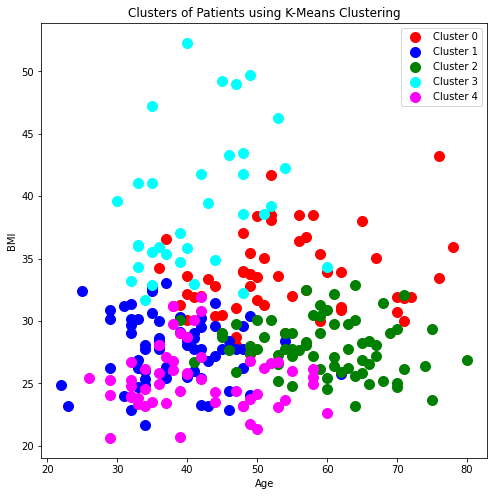

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(X.iloc[y_kmeans == 0, 3], X.iloc[y_kmeans == 0, 5], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X.iloc[y_kmeans == 1, 3], X.iloc[y_kmeans == 1, 5], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 2, 3], X.iloc[y_kmeans == 2, 5], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 3, 3], X.iloc[y_kmeans == 3, 5], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(X.iloc[y_kmeans == 4, 3], X.iloc[y_kmeans == 4, 5], s = 100, c = 'magenta', label = 'Cluster 4')
plt.title('Clusters of Patients using K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend()
plt.show()

# More plots by :**Marcos Sánchez Hernández**

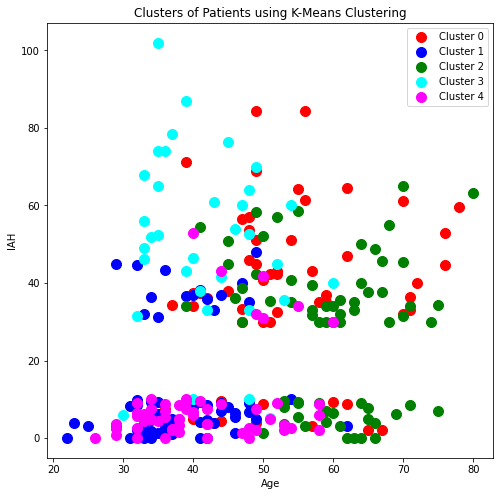

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(X.iloc[y_kmeans == 0, 3], X.iloc[y_kmeans == 0, 0], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X.iloc[y_kmeans == 1, 3], X.iloc[y_kmeans == 1, 0], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 2, 3], X.iloc[y_kmeans == 2, 0], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 3, 3], X.iloc[y_kmeans == 3, 0], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(X.iloc[y_kmeans == 4, 3], X.iloc[y_kmeans == 4, 0], s = 100, c = 'magenta', label = 'Cluster 4')
plt.title('Clusters of Patients using K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('IAH')
plt.legend()
plt.show()

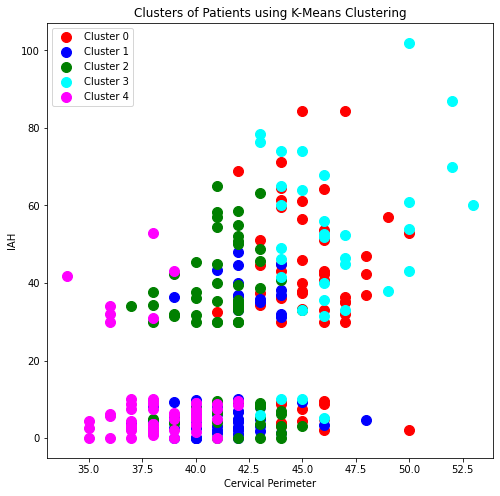

In [16]:

plt.figure(figsize=(8,8))
plt.scatter(X.iloc[y_kmeans == 0, 4], X.iloc[y_kmeans == 0, 0], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X.iloc[y_kmeans == 1, 4], X.iloc[y_kmeans == 1, 0], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 2, 4], X.iloc[y_kmeans == 2, 0], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 3, 4], X.iloc[y_kmeans == 3, 0], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(X.iloc[y_kmeans == 4, 4], X.iloc[y_kmeans == 4, 0], s = 100, c = 'magenta', label = 'Cluster 4')
plt.title('Clusters of Patients using K-Means Clustering')
plt.xlabel('Cervical Perimeter')
plt.ylabel('IAH')
plt.legend()
plt.show()

* ## Read about [Cophenet](http://www.ece.northwestern.edu/local-apps/matlabhelp/toolbox/stats/cophenet.html) correlation

In [17]:
# DISTANCE MATRIX
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

distance_matrix = linkage(X_normalized, "ward")
c, coph_distance = cophenet(distance_matrix, pdist(X_normalized))
print ("Cophenet Distance = " + str(c))

Cophenet Distance = 0.4930491112839662


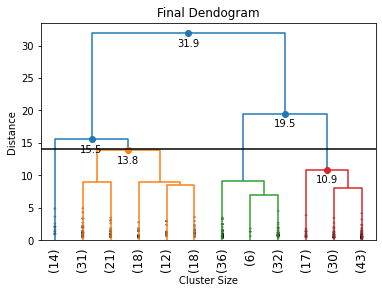

In [19]:

# DENDOGRAM REPRESENTATION:

def dendrogram_tune(*args, **kwargs):
    max_d = kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args,**kwargs)
        
    if not kwargs.get('no_plot', False):
        plt.title("Final Dendogram")
        plt.xlabel("Cluster Size")
        plt.ylabel("Distance")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x,y,'o',c = c)
                plt.annotate('%.3g' %y, (x,y), xytext = (0,-5),
                            textcoords = "offset points", va = "top", ha = "center")            
    if max_d:
        plt.axhline(y = max_d, c = 'k')
        
    return ddata



dendrogram_tune(distance_matrix, truncate_mode = 'lastp',p = 12, leaf_rotation = 90., leaf_font_size = 12.,
                show_contracted = True, annotate_above = 10, max_d = 14)
plt.show()


# More advanced cluster selection analysis by **Marcos Sánchez Hernández**

* ## Read about [SILHOUETTE](https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/)

* For k value =  2  the mean of the silhouette is : 0.3169861295140719
   - For i =  1  the cluster silhouette is :  0.35103231468028917
   - For i =  2  the cluster silhouette is :  0.23560744301921094


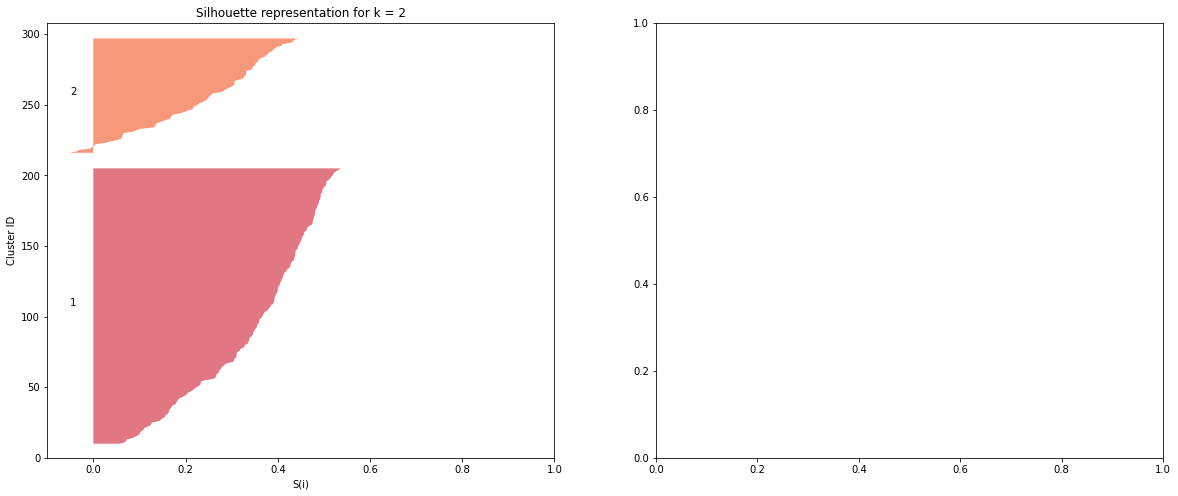

* For k value =  3  the mean of the silhouette is : 0.24568322201710596
   - For i =  1  the cluster silhouette is :  0.29169400480203705
   - For i =  2  the cluster silhouette is :  0.22081098834146914
   - For i =  3  the cluster silhouette is :  0.21066188127415017


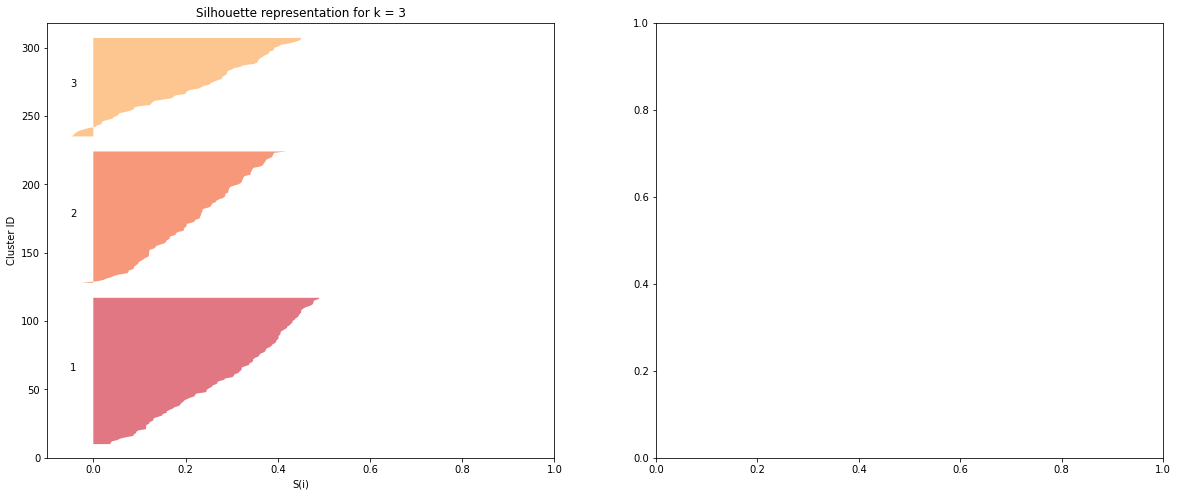

* For k value =  4  the mean of the silhouette is : 0.21058075148100192
   - For i =  1  the cluster silhouette is :  0.15367737671935014
   - For i =  2  the cluster silhouette is :  0.2599122680622058
   - For i =  3  the cluster silhouette is :  0.21339915225978554
   - For i =  4  the cluster silhouette is :  0.2241768126787067


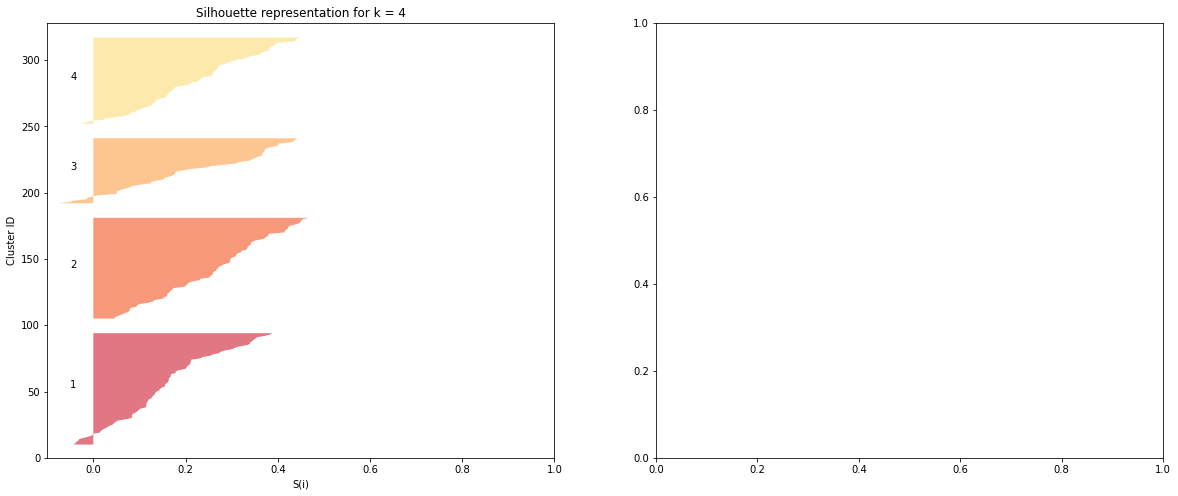

* For k value =  5  the mean of the silhouette is : 0.1989640255342831
   - For i =  1  the cluster silhouette is :  0.23208232224565017
   - For i =  2  the cluster silhouette is :  0.15239999758920475
   - For i =  3  the cluster silhouette is :  0.2626906852609624
   - For i =  4  the cluster silhouette is :  0.17225029554641008
   - For i =  5  the cluster silhouette is :  0.1720589715788335


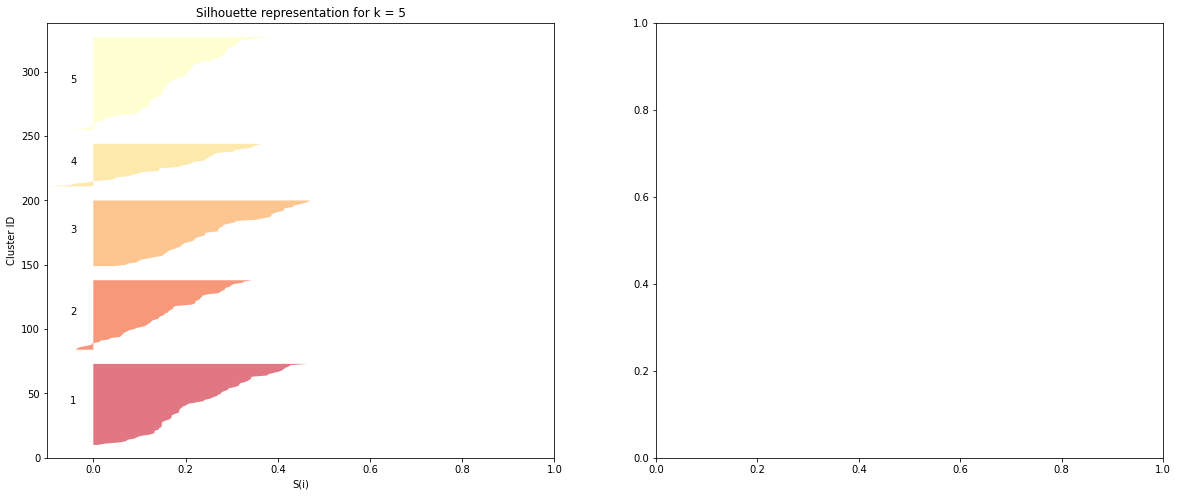

* For k value =  6  the mean of the silhouette is : 0.21192055859654793
   - For i =  1  the cluster silhouette is :  0.1395604678809942
   - For i =  2  the cluster silhouette is :  0.19625459592912134
   - For i =  3  the cluster silhouette is :  0.2830860078336103
   - For i =  4  the cluster silhouette is :  0.16265879356893956
   - For i =  5  the cluster silhouette is :  0.3046616646728123
   - For i =  6  the cluster silhouette is :  0.17263953486204106


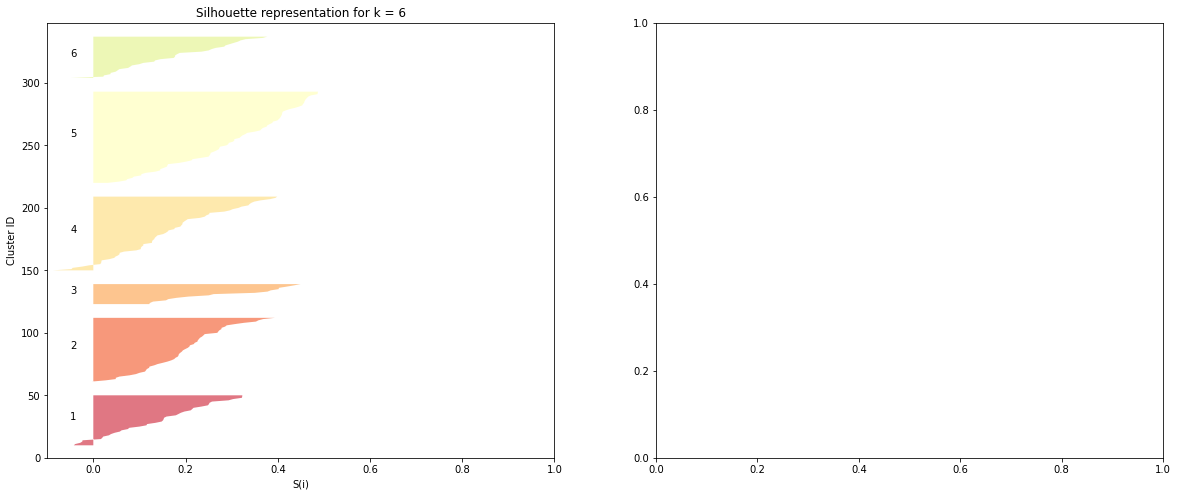

* For k value =  7  the mean of the silhouette is : 0.2139953559227994
   - For i =  1  the cluster silhouette is :  0.18267586305028766
   - For i =  2  the cluster silhouette is :  0.16477534249915068
   - For i =  3  the cluster silhouette is :  0.35307175397010615
   - For i =  4  the cluster silhouette is :  0.1988818043645622
   - For i =  5  the cluster silhouette is :  0.17717608782540228
   - For i =  6  the cluster silhouette is :  0.1243758935694876
   - For i =  7  the cluster silhouette is :  0.2586257864500139


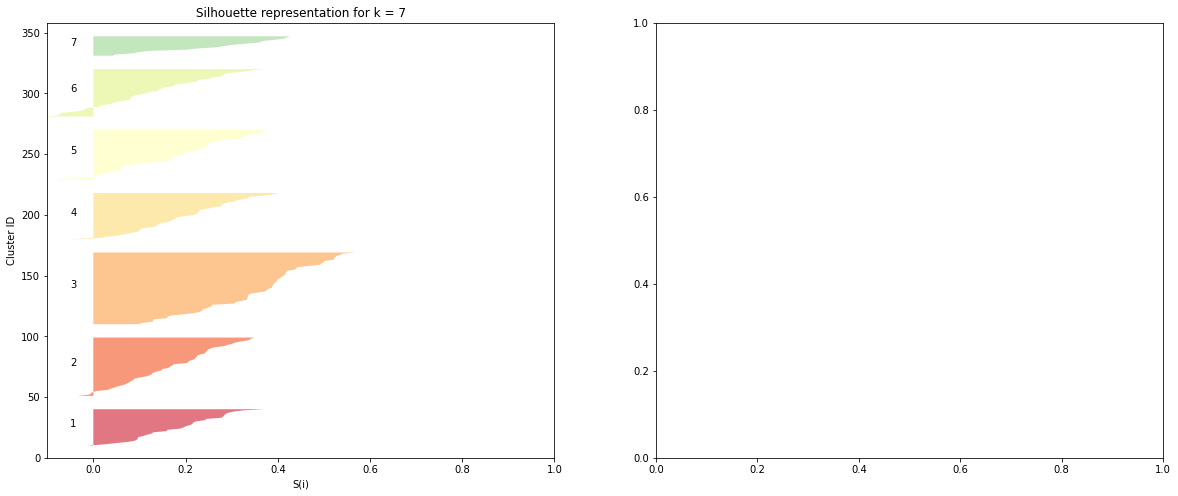

* For k value =  8  the mean of the silhouette is : 0.21038384036603802
   - For i =  1  the cluster silhouette is :  0.25124988013896543
   - For i =  2  the cluster silhouette is :  0.157186526061273
   - For i =  3  the cluster silhouette is :  0.2171382155972111
   - For i =  4  the cluster silhouette is :  0.2338219463156335
   - For i =  5  the cluster silhouette is :  0.1764466687693547
   - For i =  6  the cluster silhouette is :  0.12805266888419614
   - For i =  7  the cluster silhouette is :  0.29879600197301415
   - For i =  8  the cluster silhouette is :  0.1756123242746584


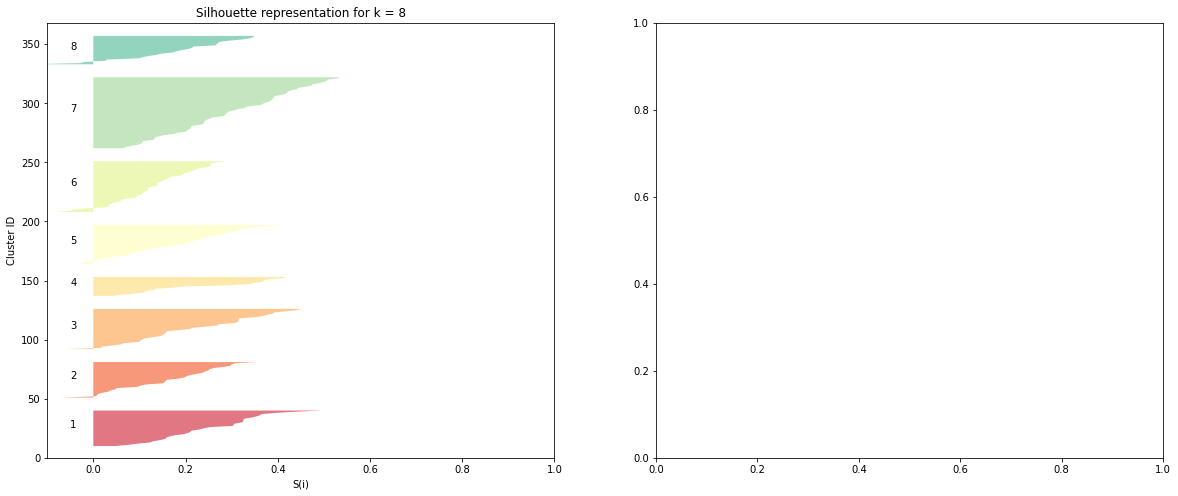

* For k value =  9  the mean of the silhouette is : 0.210597555329857
   - For i =  1  the cluster silhouette is :  0.18724060211553528
   - For i =  2  the cluster silhouette is :  0.2440850781246312
   - For i =  3  the cluster silhouette is :  0.32422879235907676
   - For i =  4  the cluster silhouette is :  0.16857227801097938
   - For i =  5  the cluster silhouette is :  0.10688351224642512
   - For i =  6  the cluster silhouette is :  0.1972484836216967
   - For i =  7  the cluster silhouette is :  0.19553729241182852
   - For i =  8  the cluster silhouette is :  0.1801417655729456
   - For i =  9  the cluster silhouette is :  0.16475431995438575


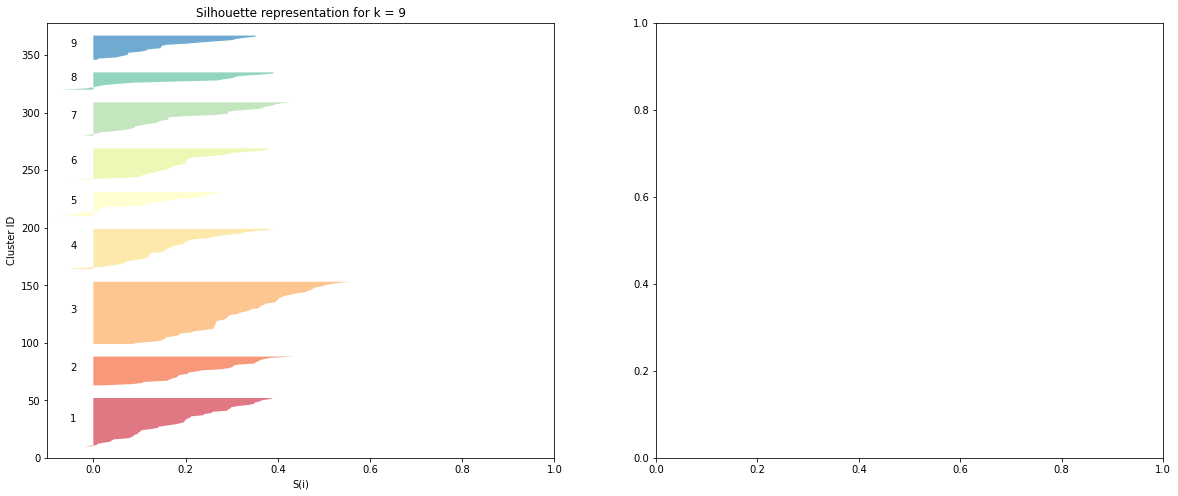

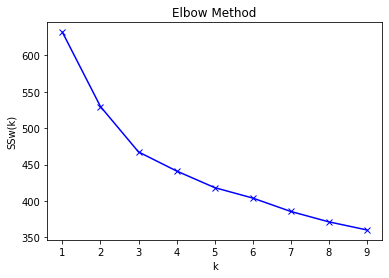

In [20]:
# NUMBER OF CLUSTERS SELECTION (ADVANCED WAY ADAPTED)
import matplotlib.cm as cm
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score


max_number_clusters = 10 
K = range(1,max_number_clusters)
ssw= []
color_map = cm.get_cmap("Spectral")
color_palette = [color_map(float(i)/max_number_clusters) for i in K]
centroid = [sum(X_normalized)/len(X_normalized) for i in K]
sst = sum(np.min(cdist(X_normalized, centroid, "euclidean"), axis = 1))

for k in K:
    kmeanModel = KMeans(n_clusters = k).fit(X_normalized)
    
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    
    ssw_k = sum(np.min(cdist(X_normalized, kmeanModel.cluster_centers_, "euclidean"), axis = 1))
    ssw.append(ssw_k)
    
    label_color = [color_palette[i] for i in labels]
    
    if 1 < k < len(X_normalized):
        fig, (axis1,axis2) = plt.subplots(1,2)
        fig.set_size_inches(20,8)

        axis1.set_xlim([-0.1, 1.0])
        axis1.set_ylim([0, len(X_normalized)+ (k + 1)* 10])
    
        silhouette_avg = silhouette_score(X_normalized, labels)
        print("* For k value = ",k, " the mean of the silhouette is :",silhouette_avg)
        sample_silhouette_values = silhouette_samples(X_normalized, labels)
        
        y_lower = 10
        for i in range(k):
            # We add the silhouette of the i-th cluster
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print("   - For i = ", i+1, " the cluster silhouette is : ", np.mean(ith_cluster_sv))
            # We order the silhouettes of the i-th cluster downwards
            ith_cluster_sv.sort()
        
            # We calculate where to place the first silhouette on the vertical axis
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            # We choose the color of the cluster
            color = color_palette[i]
            
            # We painted the silhouette of the i-th cluster
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, facecolor = color, alpha = 0.7)
            
            
            # We label this cluster with the number in the middle
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i + 1))
            
            # We calculate the new y_lower for the next cluster on the grapho
            y_lower = y_upper + 10 
            
        axis1.set_title("Silhouette representation for k = %s" %str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("Cluster ID")
        plt.show()

# Elbow Method

plt.plot(K, ssw, "bx-")
plt.xlabel("k")
plt.ylabel("SSw(k)")
plt.title("Elbow Method")
plt.show()


---
# **Now let's try hierarchical clustering**

**Marcos**: as you have done it can be interesting to start with hierarchical to have a fist idea of number of optimal clusters

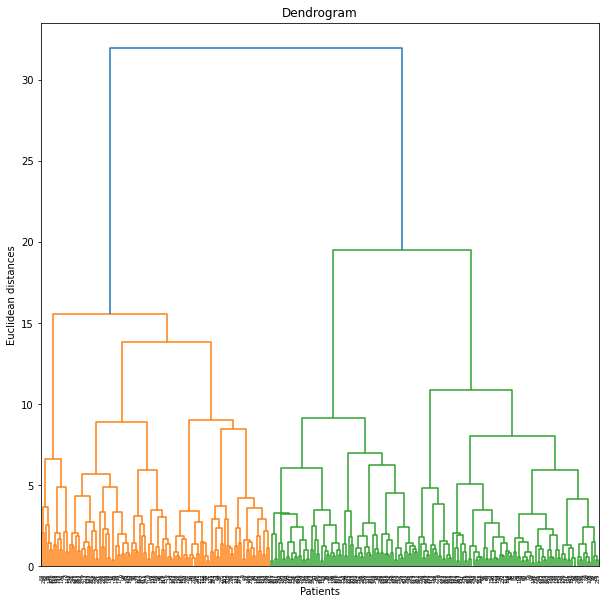

In [21]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X_normalized, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Patients')
plt.ylabel('Euclidean distances')
plt.show()

# ... again an optimal number of clusters will be 5 for hierarchical clustering. 


---

* # Now we train the hierarchical clustering algorithm and predict the cluster for each data point


In [22]:

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_normalized)


* # Once the algorithm predicts the cluster for each of the data points, it can be visualized now.

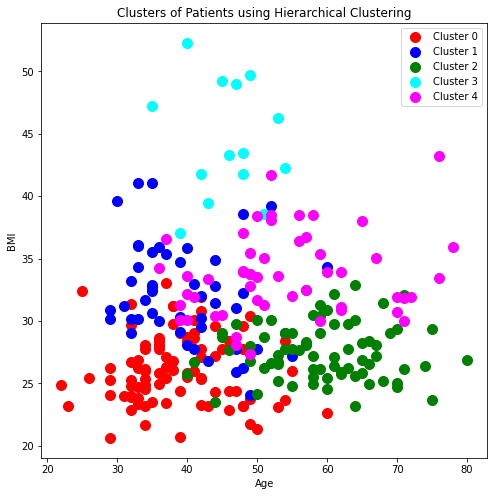

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X.iloc[y_hc == 0, 3], X.iloc[y_hc == 0, 5], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X.iloc[y_hc == 1, 3], X.iloc[y_hc == 1, 5], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X.iloc[y_hc == 2, 3], X.iloc[y_hc == 2, 5], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X.iloc[y_hc == 3, 3], X.iloc[y_hc == 3, 5], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(X.iloc[y_hc == 4, 3], X.iloc[y_hc == 4, 5], s = 100, c = 'magenta', label = 'Cluster 4')
plt.title('Clusters of Patients using Hierarchical Clustering')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend()
plt.show()

* # ... you can see it is quite similar to kmeans...


---
---
# A final contribution from by **Marcos Sánchez Hernández**

* ## Read about [Affinity Propagation](https://www.geeksforgeeks.org/affinity-propagation-in-ml-to-find-the-number-of-clusters/)


Cluste centers ID: [ 51  54  64 101 200 233 246 275]
Then number of clusters according to the affinity model is: 8
Estimated Number of Clusters: 8 
Homogeneity: 1.000 
Completeness: 1.000 
V-measure: 1.000 
R2 Adjusted: 1.000
Adjusted Mutual Information: 1.000 
Silhouette Coefficient: 0.303


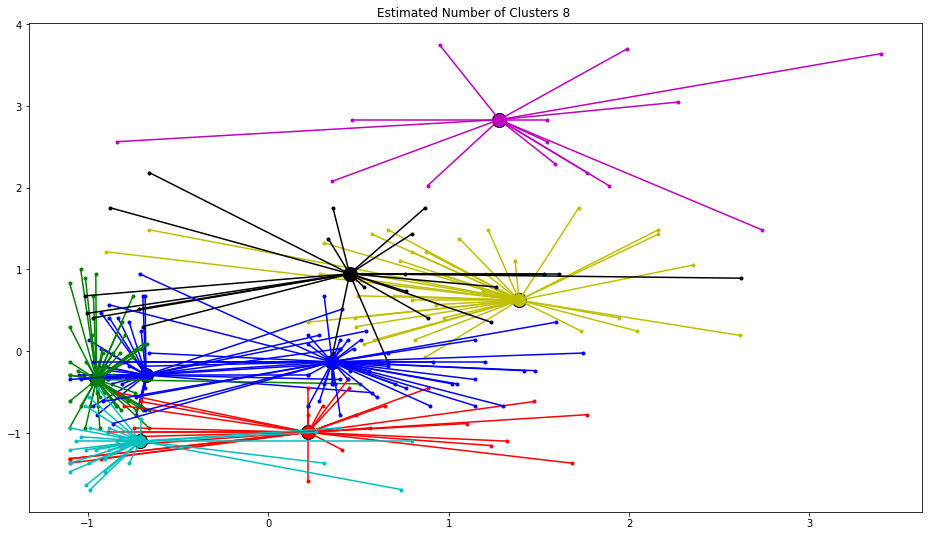

In [23]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle

# AFFINITI PROPAGATION ANALYSIS

affinity_model = AffinityPropagation(preference = -50).fit(X_normalized)
centers_ID = affinity_model.cluster_centers_indices_
print ("Cluste centers ID: " + str(centers_ID))
labels = affinity_model.labels_

n_cluster_affinity = len(centers_ID)
print ("Then number of clusters according to the affinity model is: " + str(n_cluster_affinity))

# GODD WAY FOR REPRESENT THIS ANALYSIS ADAPTED

def report_affinity_propagation(X_normalized):
    affinity_model = AffinityPropagation(preference = -50).fit(X_normalized)
    centers_ID = affinity_model.cluster_centers_indices_
    n_cluster_affinity = len(centers_ID)
    cluster_labels = affinity_model.labels_
    
    print("Estimated Number of Clusters: %d " % n_cluster_affinity)
    print("Homogeneity: %0.3f " % metrics.homogeneity_score(labels, cluster_labels))
    print("Completeness: %0.3f " % metrics.completeness_score(labels, cluster_labels))
    print("V-measure: %0.3f " % metrics.v_measure_score(labels, cluster_labels))
    print("R2 Adjusted: %0.3f" % metrics.adjusted_rand_score(labels, cluster_labels))
    print("Adjusted Mutual Information: %0.3f " % metrics.adjusted_mutual_info_score(labels, cluster_labels))
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_normalized, labels, metric = "sqeuclidean"))
    
    plt.figure(figsize = (16,9))
    plt.clf()
    
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_cluster_affinity), colors):
        class_members = (cluster_labels == k)
        cluster_center = X_normalized [centers_ID [k]]
        plt.plot(X_normalized[class_members, 0], X_normalized [class_members, 1], col + '.')
        plt.plot(cluster_center [0], cluster_center [1], 'o', markerfacecolor = col, markeredgecolor = 'k', markersize = 14)
        for x in X_normalized[class_members]:
            plt.plot([cluster_center [0], x[0]], [cluster_center [1], x[1]], col)
            
    plt.title("Estimated Number of Clusters %d " % n_cluster_affinity)
    plt.show()

report_affinity_propagation(X_normalized)


